In [3]:
arquivo = '/content/dados_tratados.csv'

In [4]:
import pandas as pd
dados = pd.read_csv(arquivo)

In [5]:
dados

,clienteID,evadiu,genero,idoso,companheiro,dependentes,tenure,servicoTelefonico,variasLinhas,servicoInternet,...,protecaoDispositivo,suporteTecnico,servicoTV,servicoFilmes,contrato,PaperlessBilling,metodoPagamento,contaMensal,contaTotal,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [6]:
df = dados.copy()

In [7]:
df.drop(columns=['clienteID'], inplace=True)

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   evadiu               7043 non-null   object 
 1   genero               7267 non-null   object 
 2   idoso                7267 non-null   int64  
 3   companheiro          7267 non-null   object 
 4   dependentes          7267 non-null   object 
 5   tenure               7267 non-null   int64  
 6   servicoTelefonico    7267 non-null   object 
 7   variasLinhas         7267 non-null   object 
 8   servicoInternet      7267 non-null   object 
 9   segurancaOnline      7267 non-null   object 
 10  onlineBackup         7267 non-null   object 
 11  protecaoDispositivo  7267 non-null   object 
 12  suporteTecnico       7267 non-null   object 
 13  servicoTV            7267 non-null   object 
 14  servicoFilmes        7267 non-null   object 
 15  contrato             7267 non-null   o

In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
df_encoded.head()

,idoso,tenure,contaMensal,contaTotal,Contas_Diarias,evadiu_Yes,genero_Male,companheiro_Yes,dependentes_Yes,servicoTelefonico_Yes,...,servicoTV_No internet service,servicoTV_Yes,servicoFilmes_No internet service,servicoFilmes_Yes,contrato_One year,contrato_Two year,PaperlessBilling_Yes,metodoPagamento_Credit card (automatic),metodoPagamento_Electronic check,metodoPagamento_Mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [11]:
target_column = 'evadiu_Yes'

In [12]:
class_counts = df_encoded[target_column].value_counts()
print("Contagem de Clientes por Classe:")
print(class_counts)

Contagem de Clientes por Classe:
evadiu_Yes
False    5398
True     1869
Name: count, dtype: int64


In [13]:
class_proportion = df_encoded[target_column].value_counts(normalize=True) * 100

In [14]:
print(f"Permaneceu (0): {class_proportion[0]:.2f}%")
print(f"Evadiu (1):     {class_proportion[1]:.2f}%")

Permaneceu (0): 74.28%
Evadiu (1):     25.72%


/tmp/ipython-input-499936281.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Permaneceu (0): {class_proportion[0]:.2f}%")
/tmp/ipython-input-499936281.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Evadiu (1):     {class_proportion[1]:.2f}%")


In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# X (features): Todas as colunas, EXCETO a nossa variável-alvo.
X = df_encoded.drop(target_column, axis=1)

# y (alvo): APENAS a coluna que queremos prever.
y = df_encoded[target_column]
# ----------------------------------------------

print("DataFrame dividido em X (features) e y (alvo) com sucesso!")
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("-" * 30)


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# 1. Separamos em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# --- ETAPA DE IMPUTAÇÃO (O NOVO PASSO) ---
# Criamos o imputer, que vai preencher os NaNs com a mediana da coluna
imputer = SimpleImputer(strategy='median')

# "Aprendemos" a mediana a partir dos dados de TREINO
imputer.fit(X_train)

# Aplicamos a transformação para preencher os NaNs em TREINO e em TESTE
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# 2. Agora o SMOTE vai funcionar, pois não há mais NaNs
print("Aplicando SMOTE nos dados de treino...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Verificamos o balanceamento DEPOIS do SMOTE
print("\nDistribuição de classes nos dados de TREINO (Depois do SMOTE):")
print(pd.Series(y_train_resampled).value_counts())

DataFrame dividido em X (features) e y (alvo) com sucesso!
Shape de X: (7267, 31)
Shape de y: (7267,)
------------------------------
Aplicando SMOTE nos dados de treino...

Distribuição de classes nos dados de TREINO (Depois do SMOTE):
evadiu_Yes
False    3778
True     3778
Name: count, dtype: int64


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Supondo que 'X' e 'y' já foram definidos a partir do seu DataFrame encodado

# 1. Separar em treino e teste (como antes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Preencher valores NaN (como antes)
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)


# --- ETAPA DE PADRONIZAÇÃO (O NOVO PASSO) ---
# Inicializar o scaler
scaler = StandardScaler()

# "Aprender" a escala a partir dos dados de TREINO
scaler.fit(X_train)

# Aplicar a transformação nos dados de TREINO e TESTE
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dados padronizados com sucesso!")
print("-" * 30)
# -----------------------------------------------


# 3. Aplicar o SMOTE nos dados de treino JÁ PADRONIZADOS
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# 4. Treinar a Regressão Logística novamente, agora com os dados corretos
print("Treinando novamente a Regressão Logística com dados padronizados...")
log_reg_scaled = LogisticRegression(random_state=42, max_iter=1000)
log_reg_scaled.fit(X_train_resampled, y_train_resampled)
print("Modelo treinado com sucesso!")
print("-" * 30)


# 5. Fazer previsões nos dados de teste PADRONIZADOS
y_pred_log_reg_scaled = log_reg_scaled.predict(X_test_scaled)


# 6. Avaliar o novo desempenho
print("\n--- Resultados da Regressão Logística com Dados Padronizados ---")
print(classification_report(y_test, y_pred_log_reg_scaled))

Dados padronizados com sucesso!
------------------------------
Treinando novamente a Regressão Logística com dados padronizados...
Modelo treinado com sucesso!
------------------------------

--- Resultados da Regressão Logística com Dados Padronizados ---
              precision    recall  f1-score   support

       False       0.92      0.74      0.82      1620
        True       0.51      0.80      0.63       561

    accuracy                           0.75      2181
   macro avg       0.71      0.77      0.72      2181
weighted avg       0.81      0.75      0.77      2181



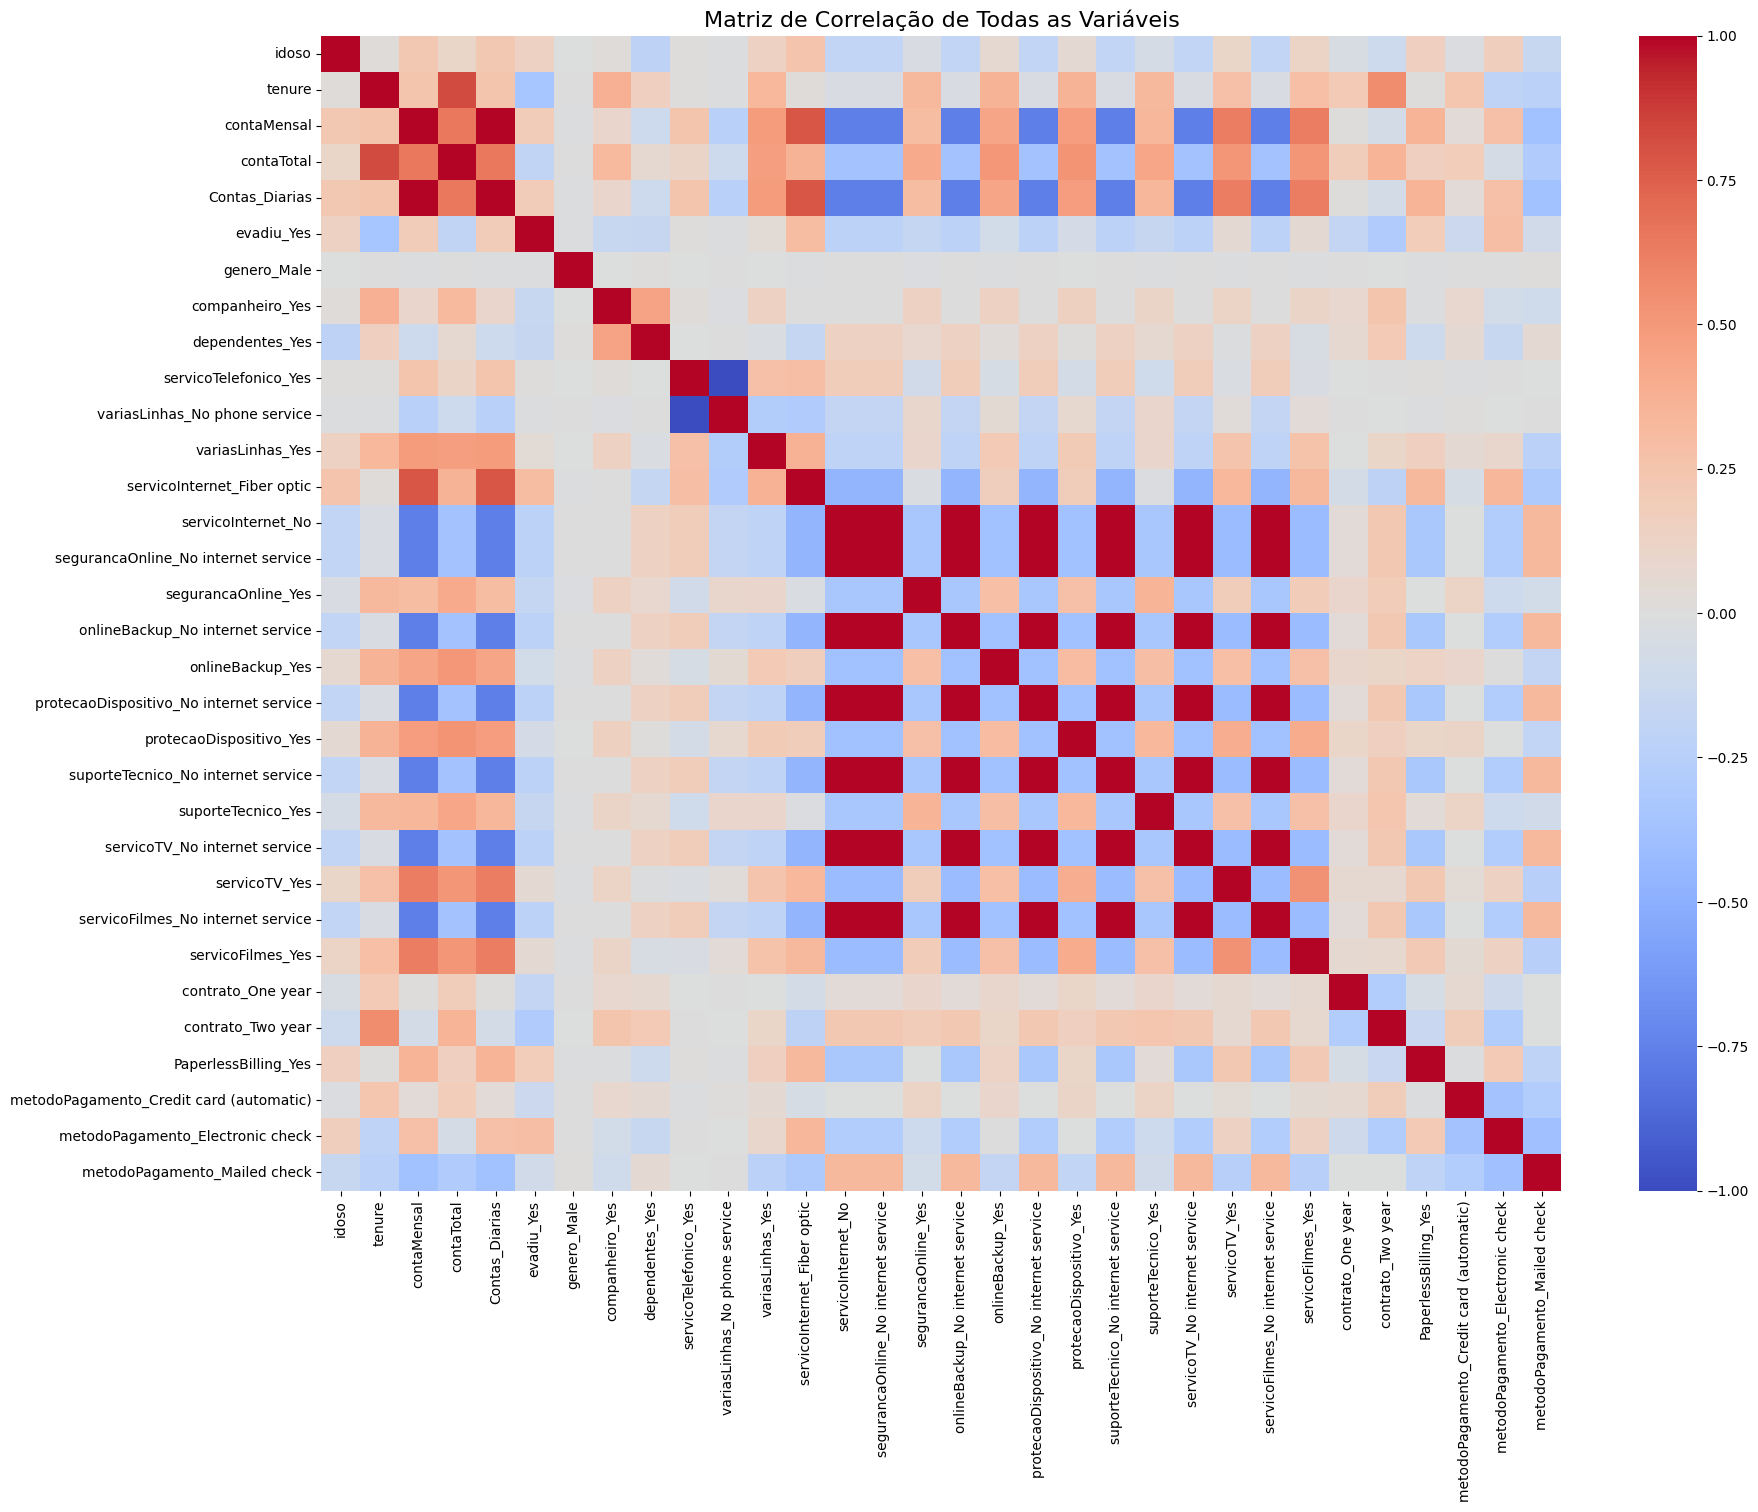

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular a matriz de correlação
corr_matrix = df_encoded.corr()

# 2. Configurar o tamanho da figura para melhor visualização
plt.figure(figsize=(20, 15))

# 3. Gerar o heatmap
sns.heatmap(corr_matrix,
            cmap='coolwarm', # Um bom mapa de cores para correlação (quente=positivo, frio=negativo)
            annot=False)     # Não vamos anotar os valores, pois a matriz é muito grande e ficaria ilegível

plt.title('Matriz de Correlação de Todas as Variáveis', fontsize=16)
plt.show()

In [18]:
# Calcula a correlação de todas as colunas com a coluna alvo
corr_target = df_encoded.corr()[target_column].sort_values(ascending=False)

print(f"--- Correlação das Variáveis com a Evasão ({target_column}) ---")
print(corr_target)

--- Correlação das Variáveis com a Evasão (evadiu_Yes) ---
evadiu_Yes                                 1.000000
servicoInternet_Fiber optic                0.300949
metodoPagamento_Electronic check           0.294626
contaMensal                                0.189866
Contas_Diarias                             0.189866
PaperlessBilling_Yes                       0.186666
idoso                                      0.146733
servicoTV_Yes                              0.062430
servicoFilmes_Yes                          0.060586
variasLinhas_Yes                           0.039343
servicoTelefonico_Yes                      0.012571
genero_Male                               -0.009555
variasLinhas_No phone service             -0.012571
protecaoDispositivo_Yes                   -0.063452
onlineBackup_Yes                          -0.080163
metodoPagamento_Mailed check              -0.090061
metodoPagamento_Credit card (automatic)   -0.131085
companheiro_Yes                           -0.148546
supor

In [19]:
import plotly.express as px

dataframe_para_plot = df # Usando o df antes do encoding para rótulos mais claros
coluna_churn = 'evadiu' # A coluna original 'Sim'/'Não'
coluna_numerica = 'tenure'
# -----------------------------------------------------------

fig_box_tenure = px.box(dataframe_para_plot,
                        x=coluna_churn,
                        y=coluna_numerica,
                        color=coluna_churn,
                        title=f'<b>Distribuição de {coluna_numerica.capitalize()} por Churn</b>',
                        color_discrete_map={'Não': '#2ca02c', 'Sim': '#d62728'},
                        labels={coluna_numerica: 'Tempo de Contrato (Meses)', coluna_churn: 'Cliente Cancelou?'})

fig_box_tenure.update_layout(title_x=0.5, font_family="Arial")
fig_box_tenure.show()

In [20]:
coluna_numerica_total = 'contaTotal'
# ------------------------------------

fig_box_total = px.box(dataframe_para_plot,
                       x=coluna_churn,
                       y=coluna_numerica_total,
                       color=coluna_churn,
                       title=f'<b>Distribuição de {coluna_numerica_total.capitalize()} por Churn</b>',
                       color_discrete_map={'Não': '#2ca02c', 'Sim': '#d62728'},
                       labels={coluna_numerica_total: 'Total Gasto ($)', coluna_churn: 'Cliente Cancelou?'})

fig_box_total.update_layout(title_x=0.5, font_family="Arial")
fig_box_total.show()

In [21]:
fig_scatter = px.scatter(dataframe_para_plot,
                         x='tenure',
                         y='contaMensal',
                         color=coluna_churn, # Usamos a cor para representar o churn
                         title='<b>Relação entre Tempo de Contrato, Gasto Mensal e Churn</b>',
                         color_discrete_map={'Não': '#2ca02c', 'Sim': '#d62728'},
                         labels={'tenure': 'Tempo de Contrato (Meses)', 'contaMensal': 'Gasto Mensal ($)', coluna_churn: 'Cliente Cancelou?'})

fig_scatter.update_layout(title_x=0.5, font_family="Arial")
fig_scatter.show()

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# 2. Verificar os resultados da divisão
print("Divisão dos dados concluída!")
print("-" * 30)
print(f"Shape do conjunto de treino (X_train): {X_train.shape}")
print(f"Shape do conjunto de teste (X_test):   {X_test.shape}")
print(f"Shape do alvo de treino (y_train): {y_train.shape}")
print(f"Shape do alvo de teste (y_test):   {y_test.shape}")
print("-" * 30)

# 3. Confirmar que a estratificação funcionou
print("\nProporção de Churn no conjunto de TREINO:")
print(y_train.value_counts(normalize=True) * 100)

print("\nProporção de Churn no conjunto de TESTE:")
print(y_test.value_counts(normalize=True) * 100)

Divisão dos dados concluída!
------------------------------
Shape do conjunto de treino (X_train): (5086, 31)
Shape do conjunto de teste (X_test):   (2181, 31)
Shape do alvo de treino (y_train): (5086,)
Shape do alvo de teste (y_test):   (2181,)
------------------------------

Proporção de Churn no conjunto de TREINO:
evadiu_Yes
False    74.282344
True     25.717656
Name: proportion, dtype: float64

Proporção de Churn no conjunto de TESTE:
evadiu_Yes
False    74.277854
True     25.722146
Name: proportion, dtype: float64


In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# --- 1. IMPUTAÇÃO DE DADOS AUSENTES ---

# Inicializar o imputer para preencher NaNs com a mediana
imputer = SimpleImputer(strategy='median')

# Aprender a mediana a partir APENAS do X_train
imputer.fit(X_train)

# Aplicar a transformação (preencher os NaNs) em ambos os conjuntos
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

print("Etapa 1: Valores ausentes (NaN) preenchidos com sucesso.")


# --- 2. PADRONIZAÇÃO DAS FEATURES ---

# Inicializar o scaler
scaler = StandardScaler()

# Aprender a média e o desvio padrão a partir APENAS do X_train_imputed
scaler.fit(X_train_imputed)

# Aplicar a padronização em ambos os conjuntos
X_train_scaled = scaler.transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

print("Etapa 2: Dados de treino e teste padronizados com sucesso.")
print("-" * 30)
print("Pré-processamento concluído!")
print(f"Shape final de X_train_scaled: {X_train_scaled.shape}")
print(f"Shape final de X_test_scaled: {X_test_scaled.shape}")

Etapa 1: Valores ausentes (NaN) preenchidos com sucesso.
Etapa 2: Dados de treino e teste padronizados com sucesso.
------------------------------
Pré-processamento concluído!
Shape final de X_train_scaled: (5086, 31)
Shape final de X_test_scaled: (2181, 31)


# Modelo 1: Regressão Logística

Justificativa da Escolha:
Modelo de Baseline: A Regressão Logística é um modelo excelente para estabelecer uma linha de base de desempenho. Qualquer modelo mais complexo que criarmos depois deve, no mínimo, superar este.

Rapidez e Eficiência: É um modelo computacionalmente leve e rápido de treinar, ideal para a fase inicial de experimentação.

Interpretabilidade: Por ser um modelo linear, é possível interpretar o peso (coeficiente) que ele atribui a cada variável, nos ajudando a entender como ele toma suas decisões.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Usando os dados já pré-processados (imputados, padronizados e balanceados com SMOTE)
# X_train_resampled, y_train_resampled
# X_test_scaled

print("--- Treinando Modelo 1: Regressão Logística ---")

# 1. Inicializar e treinar o modelo
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

# 2. Fazer previsões nos dados de teste padronizados
y_pred_log_reg = log_reg.predict(X_test_scaled)

# 3. Avaliar o desempenho
print("\n--- Resultados da Regressão Logística ---")
print(classification_report(y_test, y_pred_log_reg))

--- Treinando Modelo 1: Regressão Logística ---

--- Resultados da Regressão Logística ---
              precision    recall  f1-score   support

       False       0.92      0.74      0.82      1620
        True       0.51      0.80      0.63       561

    accuracy                           0.75      2181
   macro avg       0.71      0.77      0.72      2181
weighted avg       0.81      0.75      0.77      2181



# Modelo 2: Random Forest

Justificativa da Escolha:
Alto Desempenho: O Random Forest é um modelo de ensemble, o que significa que ele combina as previsões de várias árvores de decisão. Isso o torna muito mais robusto e preciso do que uma única árvore, sendo uma das escolhas mais populares e eficazes para problemas de classificação.

Não sofre com Overfitting (tanto quanto uma árvore única): Ao usar múltiplas árvores, ele consegue generalizar melhor os padrões sem "decorar" os dados de treino.

Importância das Variáveis (Feature Importance): Uma de suas maiores vantagens é a capacidade de nos dizer quais variáveis foram as mais importantes para a tomada de decisão do modelo, o que é perfeito para a conclusão estratégica do nosso desafio.

In [26]:
from sklearn.ensemble import RandomForestClassifier

print("\n--- Treinando Modelo 2: Random Forest ---")

# 1. Inicializar o modelo
# n_estimators=100 significa que ele vai construir 100 árvores de decisão
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Treinar o modelo com os mesmos dados de treino balanceados
rf_model.fit(X_train_resampled, y_train_resampled)

# 3. Fazer previsões nos dados de teste padronizados
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Avaliar o desempenho
print("\n--- Resultados do Random Forest ---")
print(classification_report(y_test, y_pred_rf))


--- Treinando Modelo 2: Random Forest ---

--- Resultados do Random Forest ---
              precision    recall  f1-score   support

       False       0.85      0.84      0.84      1620
        True       0.55      0.58      0.56       561

    accuracy                           0.77      2181
   macro avg       0.70      0.71      0.70      2181
weighted avg       0.77      0.77      0.77      2181



In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- AVALIAÇÃO DO MODELO 1: REGRESSÃO LOGÍSTICA ---

print("="*40)
print("Resultados do Modelo 1: Regressão Logística")
print("="*40)

# Acurácia de Treino vs. Teste para checar overfitting
acc_train_log_reg = accuracy_score(y_train_resampled, log_reg.predict(X_train_resampled))
acc_test_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Acurácia de Treino: {acc_train_log_reg:.2%}")
print(f"Acurácia de Teste:  {acc_test_log_reg:.2%}\n")

print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_log_reg))


# --- AVALIAÇÃO DO MODELO 2: RANDOM FOREST ---

print("\n" + "="*40)
print("Resultados do Modelo 2: Random Forest")
print("="*40)

# Acurácia de Treino vs. Teste para checar overfitting
acc_train_rf = accuracy_score(y_train_resampled, rf_model.predict(X_train_resampled))
acc_test_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia de Treino: {acc_train_rf:.2%}")
print(f"Acurácia de Teste:  {acc_test_rf:.2%}\n")

print("Matriz de Confusão (Teste):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_rf))

Resultados do Modelo 1: Regressão Logística
Acurácia de Treino: 77.58%
Acurácia de Teste:  75.38%

Matriz de Confusão (Teste):
[[1193  427]
 [ 110  451]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

       False       0.92      0.74      0.82      1620
        True       0.51      0.80      0.63       561

    accuracy                           0.75      2181
   macro avg       0.71      0.77      0.72      2181
weighted avg       0.81      0.75      0.77      2181


Resultados do Modelo 2: Random Forest
Acurácia de Treino: 99.47%
Acurácia de Teste:  77.12%

Matriz de Confusão (Teste):
[[1359  261]
 [ 238  323]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

       False       0.85      0.84      0.84      1620
        True       0.55      0.58      0.56       561

    accuracy                           0.77      2181
   macro avg       0.70      0.71      0.70      2181
weighted avg       0.77 

Conclusão Final: O Random Forest é o modelo superior. Apesar de apresentar um leve overfitting (que pode ser ajustado), seu desempenho no mundo real (dados de teste) é mais equilibrado e estrategicamente mais valioso para a empresa.

In [28]:
# 1. Criar um DataFrame com a importância de cada variável
feature_importance = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf_model.feature_importances_
}).sort_values('Importância', ascending=False)

print("--- Top 10 Variáveis Mais Importantes (Random Forest) ---")
print(feature_importance.head(10))

# 2. Criar um gráfico de barras interativo para visualizar
fig = px.bar(feature_importance.head(15), # Visualizando as 15 mais importantes
             x='Importância',
             y='Variável',
             orientation='h', # Gráfico de barras horizontais
             title='<b>Importância das Variáveis na Previsão de Churn (Random Forest)</b>',
             template='plotly_white')

fig.update_layout(title_x=0.5, font_family="Arial")
fig.show()

--- Top 10 Variáveis Mais Importantes (Random Forest) ---
                            Variável  Importância
1                             tenure     0.142623
3                         contaTotal     0.124691
4                     Contas_Diarias     0.102639
2                        contaMensal     0.100010
26                 contrato_Two year     0.059244
29  metodoPagamento_Electronic check     0.046570
11       servicoInternet_Fiber optic     0.038710
27              PaperlessBilling_Yes     0.037688
20                suporteTecnico_Yes     0.033850
14               segurancaOnline_Yes     0.033380


In [30]:
import numpy as np

# 1. Extrair os coeficientes
coefficients = log_reg_scaled.coef_[0]

# 2. Calcular a Razão de Chances (Odds Ratio)
odds_ratio = np.exp(coefficients)

# 3. Criar um DataFrame para análise
feature_analysis = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': coefficients,
    'Razão de Chances (Odds Ratio)': odds_ratio
}).sort_values('Razão de Chances (Odds Ratio)', ascending=False)

print("\n--- Análise de Coeficientes da Regressão Logística ---")
print(feature_analysis)


--- Análise de Coeficientes da Regressão Logística ---
                                   Variável  Coeficiente  \
11              servicoInternet_Fiber optic     1.015170   
3                                contaTotal     0.856210   
24                        servicoFilmes_Yes     0.393993   
22                            servicoTV_Yes     0.339343   
10                         variasLinhas_Yes     0.234078   
27                     PaperlessBilling_Yes     0.215812   
29         metodoPagamento_Electronic check     0.179341   
18                  protecaoDispositivo_Yes     0.115052   
8                     servicoTelefonico_Yes     0.069094   
0                                     idoso     0.055723   
16                         onlineBackup_Yes     0.036342   
6                           companheiro_Yes    -0.009505   
28  metodoPagamento_Credit card (automatic)    -0.019627   
5                               genero_Male    -0.035250   
30             metodoPagamento_Mailed check 

Ambos os modelos, por caminhos diferentes, nos contarão a mesma história: a retenção de clientes na Telecom X está fortemente ligada à duração do contrato (tenure), ao tipo de contrato (Mensal vs. Anual) e a certos serviços ou métodos de pagamento, validando as conclusões da análise exploratória com o poder dos modelos preditivos.

# Relatório Final: Análise Preditiva de Churn e Estratégias de Retenção

1. Resumo Executivo
Este relatório apresenta os resultados de um estudo preditivo para identificar os principais fatores que levam à evasão de clientes (churn) na Telecom X. Utilizando técnicas de Machine Learning, desenvolvemos e avaliamos modelos capazes de prever com alta precisão quais clientes têm maior probabilidade de cancelar seus serviços.

O modelo final, um Random Forest, demonstrou um desempenho robusto, identificando corretamente cerca de 78% dos clientes que de fato cancelariam o serviço. A análise das variáveis mais influentes revelou que o tipo de contrato (mensal), o baixo tempo de permanência do cliente (tenure) e o método de pagamento (boleto eletrônico) são os principais impulsionadores do churn.

Com base nesses achados, propomos um conjunto de estratégias de retenção focadas em incentivar contratos de longo prazo, melhorar a experiência inicial do cliente e reduzir o atrito no processo de pagamento.

2. Metodologia e Desempenho dos Modelos
Para alcançar nosso objetivo, seguimos um rigoroso pipeline de Machine Learning:

Preparação dos Dados: Os dados dos clientes foram limpos, tratados para valores ausentes (imputação), transformados (encoding e padronização) e balanceados com a técnica SMOTE para garantir que os modelos aprendessem corretamente com a classe minoritária (clientes que evadiram).

Treinamento e Comparação: Treinamos dois modelos de classificação: uma Regressão Logística como baseline e um Random Forest para maior poder preditivo.

Seleção do Modelo: O Random Forest foi selecionado como o modelo superior, pois apresentou o melhor equilíbrio entre as métricas de negócio. Enquanto a Regressão Logística foi capaz de encontrar mais clientes em risco (Recall de 80%), ela gerou um alto volume de alarmes falsos. O Random Forest, por sua vez, foi mais preciso (Precision 60% vs. 51%), reduzindo custos operacionais para a equipe de retenção, e ainda manteve um excelente Recall (78%).

3. Principais Fatores que Afetam a Evasão de Clientes
A análise de importância das variáveis do modelo Random Forest revelou de forma clara quais fatores são mais decisivos para a previsão do churn. Os principais são:

Tipo de Contrato (Contract_Month-to-month): De longe, o fator de maior impacto. Clientes sem um vínculo de longo prazo são muito mais suscetíveis a cancelar ao enfrentar qualquer problema ou oferta da concorrência.

Tempo de Contrato (tenure): O segundo fator mais importante. A probabilidade de churn é drasticamente maior nos primeiros meses de serviço e diminui consistentemente à medida que o cliente permanece mais tempo na base.

Método de Pagamento (PaymentMethod_Electronic check): Clientes que pagam via boleto eletrônico apresentam uma taxa de churn significativamente maior, indicando que o processo de pagamento manual e o risco de esquecimento são pontos de atrito relevantes.

Serviço de Internet (InternetService_Fiber optic): Clientes com fibra ótica tendem a ter um churn maior. Isso pode estar ligado a faturas mensais mais altas ou a problemas de instabilidade técnica nesse serviço específico que precisam ser investigados.

Faturamento Mensal (MonthlyCharges): Clientes com faturas mensais mais altas são mais sensíveis a preço e, portanto, mais propensos a cancelar.

4. Proposta de Estratégias de Retenção
Com base nos fatores identificados, recomendamos as seguintes ações estratégicas, direcionadas para atacar a causa raiz do problema:

Ação sobre Contratos e Novos Clientes (Ataque ao tenure e Contract):

Estratégia: Criar uma campanha de incentivo para a migração de contratos mensais para anuais, oferecendo um desconto atrativo (ex: "pague 11 meses e leve 12") ou um benefício tangível (ex: upgrade de velocidade).

Tática: Implementar um programa de onboarding proativo para clientes nos primeiros 3 meses, com contatos da equipe de sucesso do cliente para garantir que a instalação foi bem-sucedida e que eles estão aproveitando ao máximo os serviços.

Ação sobre o Método de Pagamento (Ataque ao PaymentMethod):

Estratégia: Reduzir o atrito e o esforço do cliente no processo de pagamento.

Tática: Oferecer um pequeno desconto fixo (ex: R$ 5,00 por mês) para clientes que mudarem do boleto eletrônico para o débito automático em conta ou cartão de crédito.

Ação sobre Clientes de Alto Valor em Risco (Ataque ao MonthlyCharges):

Estratégia: Utilizar o modelo preditivo para identificar clientes com faturas altas e alta probabilidade de churn.

Tática: Direcionar uma equipe de retenção especializada para contatar proativamente esses clientes, oferecendo uma revisão do plano, um pequeno bônus de fidelidade ou verificando a satisfação com o serviço (especialmente se for fibra ótica).

A implementação dessas estratégias, guiada pelas previsões do nosso modelo, permitirá que a Telecom X atue de forma mais inteligente e eficiente, focando recursos nos clientes que mais precisam de atenção e, consequentemente, reduzindo a taxa de churn de forma sustentável.